In [29]:
# Step 1: Upload the dataset from your local machine
from google.colab import files
uploaded = files.upload()

# Step 2: Import necessary libraries
import pandas as pd

# Step 3: Load the CSV file into a DataFrame
df = pd.read_csv("survey.csv")

# Step 4: Preview the first few rows
df.head()

# Step 5: Basic dataset information
print("Rows and columns:", df.shape)
print("Column names:\n", df.columns.tolist())
print("Data types per column:\n", df.dtypes)
print("Summary statistics (numeric):\n", df.describe())
print("Missing values per column:\n", df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())


Saving survey.csv to survey (2).csv
Rows and columns: (1259, 27)
Column names:
 ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']
Data types per column:
 Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     

In [ ]:
# Step 6: Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Step 7: Convert 'comments' to string type (optional free-text field)
df['comments'] = df['comments'].astype('string')

# Step 8: Explore unusual or missing entries
print("self_employed:", df['self_employed'].unique())
print("state:", df['state'].unique())
print("work_interfere:", df['work_interfere'].unique())
print("Example comments:\n", df['comments'].dropna().sample(5).tolist())

# Step 9: Fill missing values
df['self_employed'] = df['self_employed'].fillna('No')
df['state'] = df['state'].fillna('Not USA')
df['work_interfere'] = df['work_interfere'].fillna("Don't know")
df['comments'] = df['comments'].fillna('No comment')


self_employed: [nan 'Yes' 'No']
state: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']
work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' nan]
Example comments:
 ['it is my opinion that bad mental health is a red flag for employers and i would never bring it up.', 'Many of these questions were difficult to answer as a self-employed person; I did my best with the available options.', "In Germany your employer doesn't really provide mental health benefits. There's a standard and I get that but I would get the same at any other company in Germany.", "Though it doesn't affect me (male) good job for making the Gender field a text input instead of a drop down of only two options.", '* Small family business - YMMV.']


object is a generic text/string data type in pandas that stores each value individually in memory. It's best used for free-form text like names, open-ended responses, or unique strings.

category is a pandas data type for fixed sets of values, storing them as integer codes with a lookup table. It's ideal for repeated, low-cardinality values like gender, country, or survey responses, offering better performance and lower memory usage.

In [ ]:
#  Explanation of types:
# 'object' = generic string type, slower and memory-heavy
# 'category' = optimized for repeated string values; improves performance


# Step 10: Convert appropriate columns to 'category' type for memory efficiency
category_cols = [
    'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment',
    'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits',
    'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
    'mental_health_consequence', 'phys_health_consequence', 'coworkers',
    'supervisor', 'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence'
]

for col in category_cols:
    df[col] = df[col].astype('category')


In [ ]:
# Step 11: Normalize gender responses
df['Gender'] = df['Gender'].str.strip().str.lower()

# Step 12: Define keyword lists (already lowercase)
male_terms = ['male', 'm', 'man', 'cis male', 'cis man', 'mal', 'maile', 'msle', 'mail', 'malr', 'make', 'male (cis)', 'guy']
female_terms = ['female', 'f', 'cis female', 'femake', 'femail', 'cis-female/femme', 'female (cis)', 'female (trans)']

# Step 13: Categorize with exact match
def categorize_gender(gender):
    gender = gender.strip().lower()
    if gender in male_terms:
        return 'Male'
    elif gender in female_terms:
        return 'Female'
    else:
        return 'Other'

# Apply and replace cleaned column
df['Gender_Category'] = df['Gender'].apply(lambda x: categorize_gender(x) if isinstance(x, str) else 'Other')

# Check result
print("Fixed Gender Category values:\n", df[['Gender', 'Gender_Category']].head(5))
df['Gender_Category'].unique()

Fixed Gender Category values:
    Gender Gender_Category
0  female          Female
1    male            Male
2    male            Male
3    male            Male
4    male            Male


array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# Step 14: Analyze and clean age column
print(df['Age'].describe())

# Find outliers
print("Ages under 0:", df[df['Age'] < 0]['Age'].unique())
print("Ages over 100:", df[df['Age'] > 100]['Age'].unique())

# Remove invalid age rows
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
print("New age range:", df['Age'].min(), "to", df['Age'].max())


count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64
Ages under 0: [  -29 -1726    -1]
Ages over 100: [        329 99999999999]
New age range: 5 to 72


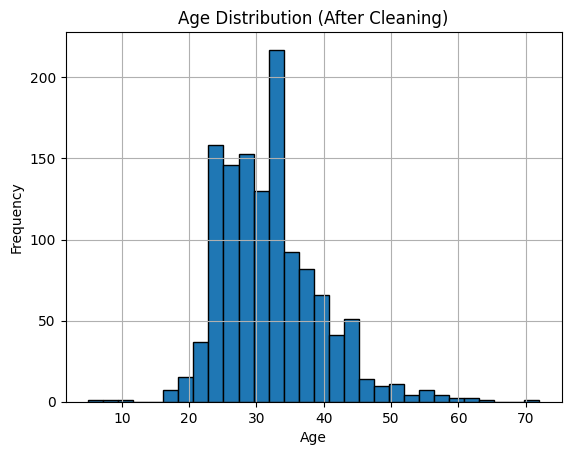

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Step 15: Categorize age into bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 75]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

# Step 16: Calculate normalized treatment count per age group
age_group_dist = df.groupby(['Age_Group', 'treatment']).size().groupby(level=0).apply(lambda x: x / x.sum())

# Step 17: Gender-wise mental health treatment frequency
gender_dist = df.groupby('Gender_Category')['treatment'].value_counts(normalize=True)

# Step 18: Country-wise treatment distribution
country_dist = df.groupby('Country')['treatment'].value_counts(normalize=True)

# Display insights
print("Age Group Distribution of Mental Health Conditions:\n", age_group_dist)
print("\nGender-Based Frequency of Mental Health Issues:\n", gender_dist)
print("\nCountries with Highest and Lowest Reported Rates:\n", country_dist)


Age Group Distribution of Mental Health Conditions:
 AgeGroup  AgeGroup  treatment
(0, 18]   (0, 18]   No           0.600000
                    Yes          0.400000
(18, 25]  (18, 25]  No           0.514286
                    Yes          0.485714
(25, 35]  (25, 35]  No           0.513552
                    Yes          0.486448
(35, 45]  (35, 45]  No           0.447653
                    Yes          0.552347
(45, 55]  (45, 55]  No           0.428571
                    Yes          0.571429
(55, 65]  (55, 65]  No           0.384615
                    Yes          0.615385
(65, 75]  (65, 75]  No           0.000000
                    Yes          1.000000
dtype: float64

Gender-Based Frequency of Mental Health Issues:
 Gender_Category  treatment
Female           Yes          0.690763
                 No           0.309237
Male             No           0.547112
                 Yes          0.452888
Other            Yes          0.777778
                 No           0.222222
Nam

<ipython-input-17-932334e65ed0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_dist = df.groupby(['AgeGroup', 'treatment']).size().groupby(level=0).apply(lambda x: x / x.sum())
<ipython-input-17-932334e65ed0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_dist = df.groupby(['AgeGroup', 'treatment']).size().groupby(level=0).apply(lambda x: x / x.sum())
<ipython-input-17-932334e65ed0>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

In [ ]:
# Capitalize all column names (first letter uppercase, rest lowercase)
df.columns = df.columns.str.strip().str.capitalize()
#df.drop(columns='Gender', inplace=True)
# Confirm changes
print("Updated column names:\n", df.columns.tolist())
df

Updated column names:
 ['Timestamp', 'Age', 'Country', 'State', 'Self_employed', 'Family_history', 'Treatment', 'Work_interfere', 'No_employees', 'Remote_work', 'Tech_company', 'Benefits', 'Care_options', 'Wellness_program', 'Seek_help', 'Anonymity', 'Leave', 'Mental_health_consequence', 'Phys_health_consequence', 'Coworkers', 'Supervisor', 'Mental_health_interview', 'Phys_health_interview', 'Mental_vs_physical', 'Obs_consequence', 'Comments', 'Gender_category', 'Agegroup']


,Timestamp,Age,Country,State,Self_employed,Family_history,Treatment,Work_interfere,No_employees,Remote_work,...,Phys_health_consequence,Coworkers,Supervisor,Mental_health_interview,Phys_health_interview,Mental_vs_physical,Obs_consequence,Comments,Gender_category,Agegroup
0,2014-08-27 11:29:31,37,United States,IL,No,No,Yes,Often,6-25,No,...,No,Some of them,Yes,No,Maybe,Yes,No,No comment,Female,"(35, 45]"
1,2014-08-27 11:29:37,44,United States,IN,No,No,No,Rarely,More than 1000,No,...,No,No,No,No,No,Don't know,No,No comment,Male,"(35, 45]"
2,2014-08-27 11:29:44,32,Canada,No information,No,No,No,Rarely,6-25,No,...,No,Yes,Yes,Yes,Yes,No,No,No comment,Male,"(25, 35]"
3,2014-08-27 11:29:46,31,United Kingdom,No information,No,Yes,Yes,Often,26-100,No,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,No comment,Male,"(25, 35]"
4,2014-08-27 11:30:22,31,United States,TX,No,No,No,Never,100-500,Yes,...,No,Some of them,Yes,Yes,Yes,Don't know,No,No comment,Male,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,United Kingdom,No information,No,No,Yes,Don't know,26-100,No,...,No,Some of them,Some of them,No,No,Don't know,No,No comment,Male,"(25, 35]"
1255,2015-09-26 01:07:35,32,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,No,Some of them,Yes,No,No,Yes,No,No comment,Male,"(25, 35]"
1256,2015-11-07 12:36:58,34,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Yes,No,No,No,No,No,No,No comment,Male,"(25, 35]"
1257,2015-11-30 21:25:06,46,United States,NC,No,No,No,Don't know,100-500,Yes,...,No,No,No,No,No,No,No,No comment,Female,"(45, 55]"


In [28]:
# Group by Country and Treatment, then calculate the proportion of 'Yes' answers
country_dist = df.groupby('Country')['Treatment'].value_counts(normalize=True).unstack()


# Sort countries by treatment rate (descending)
treatment_rate_sorted = country_dist.sort_values(by='Yes', ascending=False)

# Show top and bottom 5 countries by treatment rate
print("Countries with the highest Reported Mental Health Treatment Rates:\n")
print(treatment_rate_sorted[['Yes']].head(10))

print("Countries with the lowest Reported Mental Health Treatment Rates:\n")
print(treatment_rate_sorted[['Yes']].tail(10))


Countries with the highest Reported Mental Health Treatment Rates:

Treatment          Yes
Country               
Bahamas, The  1.000000
Croatia       1.000000
Denmark       1.000000
Moldova       1.000000
Japan         1.000000
Slovenia      1.000000
South Africa  0.666667
New Zealand   0.625000
Australia     0.619048
Poland        0.571429
Countries with the lowest Reported Mental Health Treatment Rates:

Treatment    Yes
Country         
Georgia      0.0
Israel       0.0
Russia       0.0
Philippines  0.0
Portugal     0.0
Romania      0.0
Thailand     0.0
Spain        0.0
Uruguay      0.0
Zimbabwe     0.0


<ipython-input-28-af905d564390>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_dist = df.groupby('Country')['Treatment'].value_counts(normalize=True).unstack()
